In [31]:
from collections import Counter

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report, silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SVMSMOTE
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer = pd.read_csv(
    'assets/Breast Cancer Wisconsin.csv',
    sep=',',
    header=0
)
breast_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
breast_cancer.drop(
    ['id', 'Unnamed: 32'] ,axis=1, inplace=True
)

In [4]:
values_len = len(breast_cancer)
values = breast_cancer.diagnosis.unique()
counts = breast_cancer.diagnosis.value_counts()

print(f'{values[0]}: {counts[0]} | {counts[0] / values_len * 100:3f}%')
print(f'{values[1]}: {counts[1]} | {counts[1] / values_len * 100:3f}%')

M: 357 | 62.741652%
B: 212 | 37.258348%


Text(0, 0.5, 'Número de observaciones')

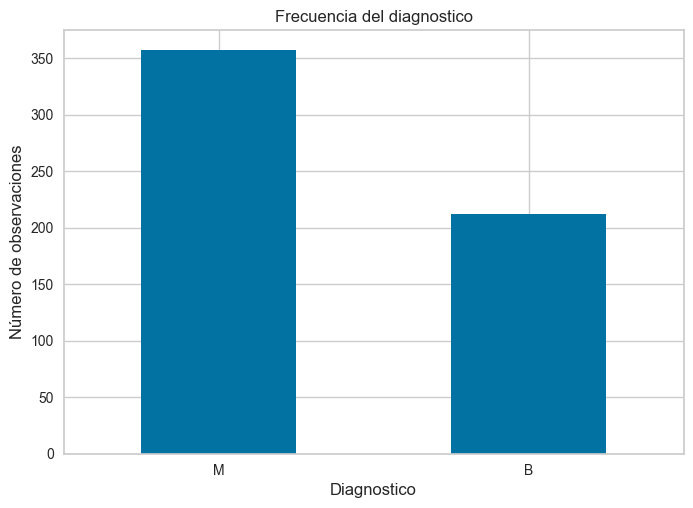

In [5]:
count_classes = pd.value_counts(breast_cancer.diagnosis, sort=True)
count_classes.plot(kind='bar', rot=0)
plt.xticks(range(2), ['M', 'B'])
plt.title('Frecuencia del diagnostico')
plt.xlabel('Diagnostico')
plt.ylabel('Número de observaciones')

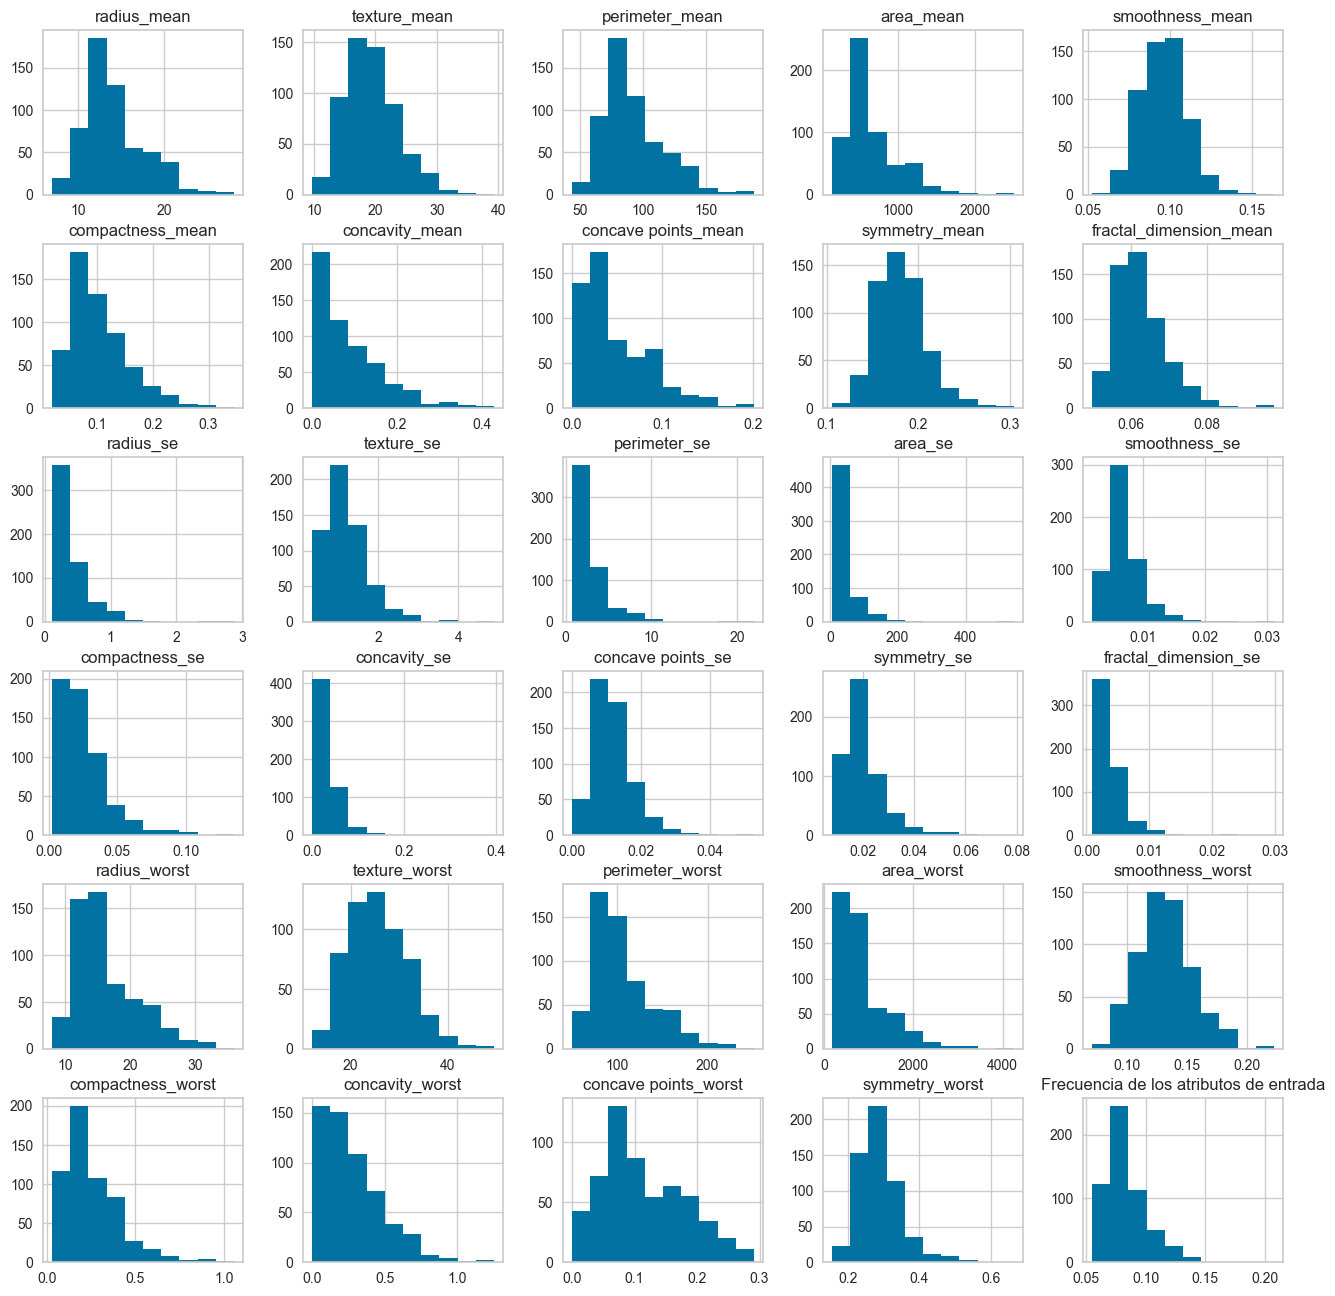

In [6]:
breast_cancer.drop('diagnosis', axis=1).hist(figsize=(16, 16))
plt.title('Frecuencia de los atributos de entrada')
plt.show()

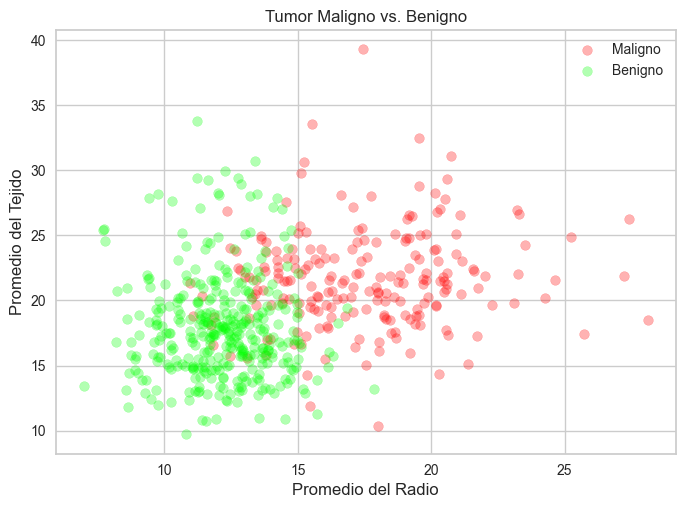

In [7]:
M = breast_cancer[breast_cancer.diagnosis == 'M']
B = breast_cancer[breast_cancer.diagnosis == 'B']

plt.title('Tumor Maligno vs. Benigno')
plt.xlabel('Promedio del Radio')
plt.ylabel('Promedio del Tejido')
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = 'Maligno', alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = 'Benigno', alpha = 0.3)
plt.legend()
plt.show()

In [8]:
breast_cancer = pd.get_dummies(
    breast_cancer, columns=['diagnosis'], drop_first=True
)
breast_cancer.rename(
    columns={'diagnosis_M': 'diagnosis'}, inplace=True
)

breast_cancer.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [9]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer.diagnosis

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
oversample = KMeansSMOTE()
X, y = oversample.fit_resample(X, y)

Counter(y)

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({1: 362, 0: 357})

In [11]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,15.668626,18.688818,103.139144,767.059096,0.104358,0.139569,0.133935,0.075688,0.187541,0.063362,...,20.719557,28.098020,138.650663,1322.042817,0.150545,0.495766,0.457487,0.192944,0.355965,0.103686
715,17.977385,18.928283,115.329641,984.738524,0.085886,0.086383,0.085277,0.058212,0.198899,0.052834,...,20.511537,25.841147,130.603493,1271.611780,0.113738,0.170315,0.294767,0.130481,0.418368,0.068347
716,19.141026,25.416736,131.034075,1126.725250,0.107375,0.218192,0.201202,0.126328,0.208118,0.075616,...,20.699233,31.090688,147.395267,1317.926834,0.118394,0.345349,0.313940,0.179763,0.281796,0.098049
717,24.951625,21.310722,167.625685,1901.813070,0.104035,0.205147,0.239235,0.148246,0.195930,0.066268,...,29.752718,26.148118,204.110357,2628.783786,0.132352,0.394105,0.452334,0.239367,0.301754,0.092878


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=00000
)

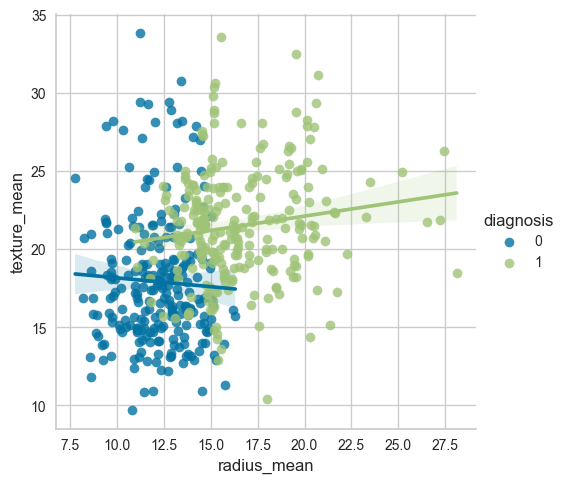

In [13]:
xm = X_train.copy()
xm['diagnosis'] = y_train
xm

sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=xm)

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

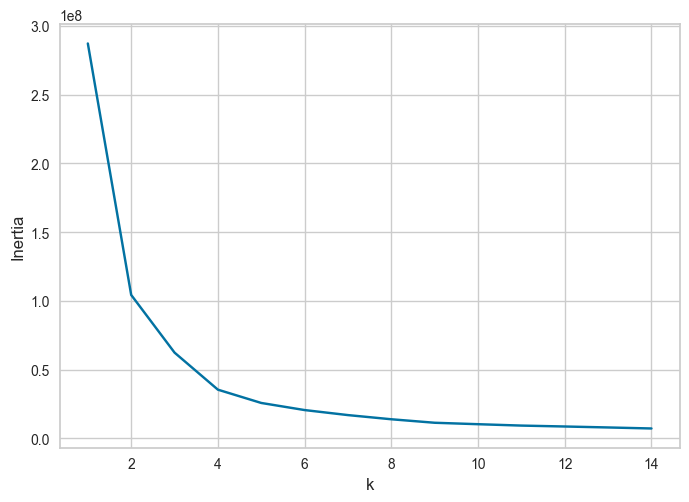

In [14]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

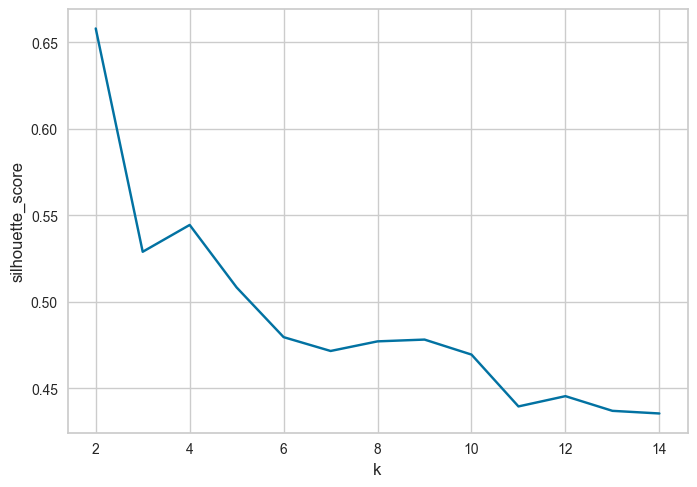

In [15]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=2, random_state=00000)
y_pred = kmeans.fit_predict(X)

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


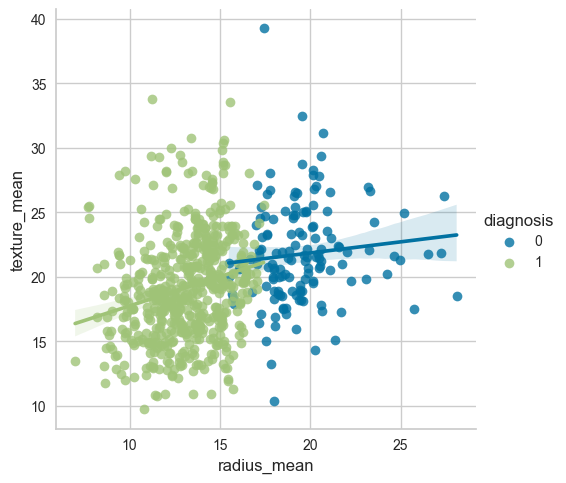

In [17]:
xm = X.copy()
xm['diagnosis'] = y_pred
xm

sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=xm)

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


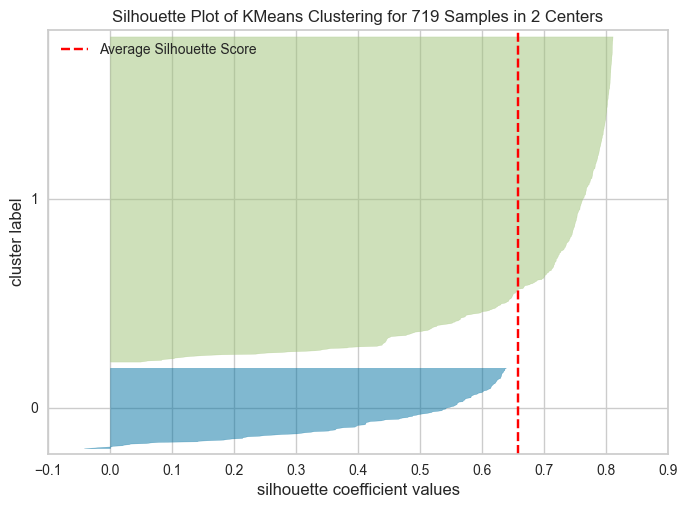

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 719 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [19]:
silhouette_score(X, y_pred)

0.6580337736390964

In [20]:
def kmeans_model(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=00000)
    y_pred = kmeans.fit_predict(X)

    return kmeans, y_pred

def kmeans_get_k(X, y):
    # Elbow method
    silhouette_scores = []
    K = range(2,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        y = km.predict(X)
        silhouette_scores.append(silhouette_score(X, y))

    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    plt.show()

    # Silhouette method
    silhouette_scores = []
    K = range(2,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        y = km.predict(X)
        silhouette_scores.append(silhouette_score(X, y))

    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    plt.show()

    return max(silhouette_scores)

def kmeans_plot_clusters(X, y):
    xm = X.copy()
    xm['diagnosis'] = y

    sns.lmplot(
        x='radius_mean',
        y='texture_mean',
        hue='diagnosis',
        data=xm
    )
    plt.show()

def kmeans_plot_metrics(kmeans, X):
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(X)
    visualizer.show()

# n_clusters = kmeans_get_k(X, y)
# kmeans, y_pred = kmeans_model(n_clusters)

In [21]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer.diagnosis

oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

Counter(y)

Counter({1: 357, 0: 357})

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
709    1
710    1
711    1
712    1
713    1
Name: diagnosis, Length: 714, dtype: uint8

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=00000
)

In [27]:
def svm_model(X_train, y_train, X_test):
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    return svc, y_pred

svm, y_pred = svm_model(X_train, y_train, X_test)

c:\Users\samaf\OneDrive - Universidad de la Amazonia\Documents\Estudios\Uniamazonia\Inteligencia Computacional - Octavo Semestre\Ejercicios\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


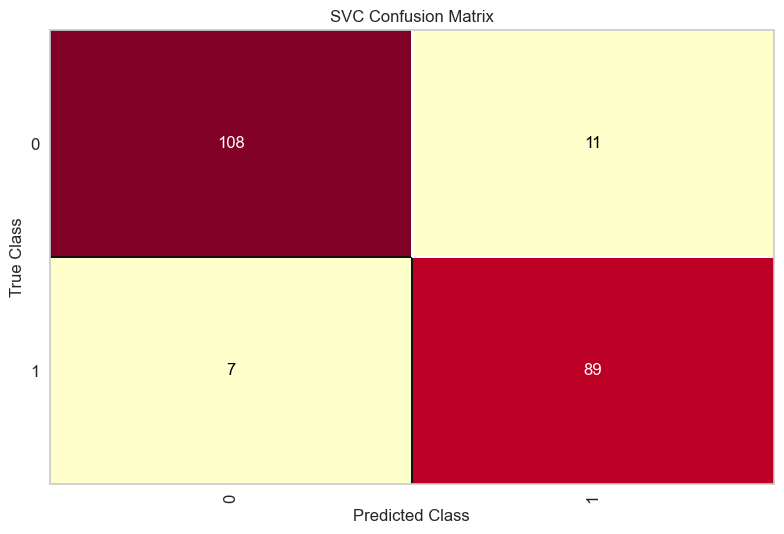

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
def svm_plot_confusion_matrix(
    svm, X_train, y_train, X_test, y_test
):
    matrix = ConfusionMatrix(svm)
    matrix.fit(X_train, y_train)
    matrix.score(X_test, y_test)
    matrix.show()

In [33]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f'El accuracy es: {test_accuracy}')

El accuracy es: 0.9162790697674419


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       119
           1       0.89      0.93      0.91        96

    accuracy                           0.92       215
   macro avg       0.91      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



In [ ]:
def svm_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)

    print(f'El accuracy es: {accuracy}')
    print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

           0       0.94      0.91      0.92       119
           1       0.89      0.93      0.91        96

    accuracy                           0.92       215
   macro avg       0.91      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215


In [ ]:
El accuracy es: 0.9162790697674419